In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50, VGG16, InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Set parameters
img_width, img_height = 224, 224
batch_size = 32
epochs = 10

In [4]:
# Load and preprocess data
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = train_datagen.flow_from_directory(
    'data2/train',  # Path to training data
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    'data2/test',  # Path to test data
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 8716 images belonging to 10 classes.
Found 2914 images belonging to 10 classes.


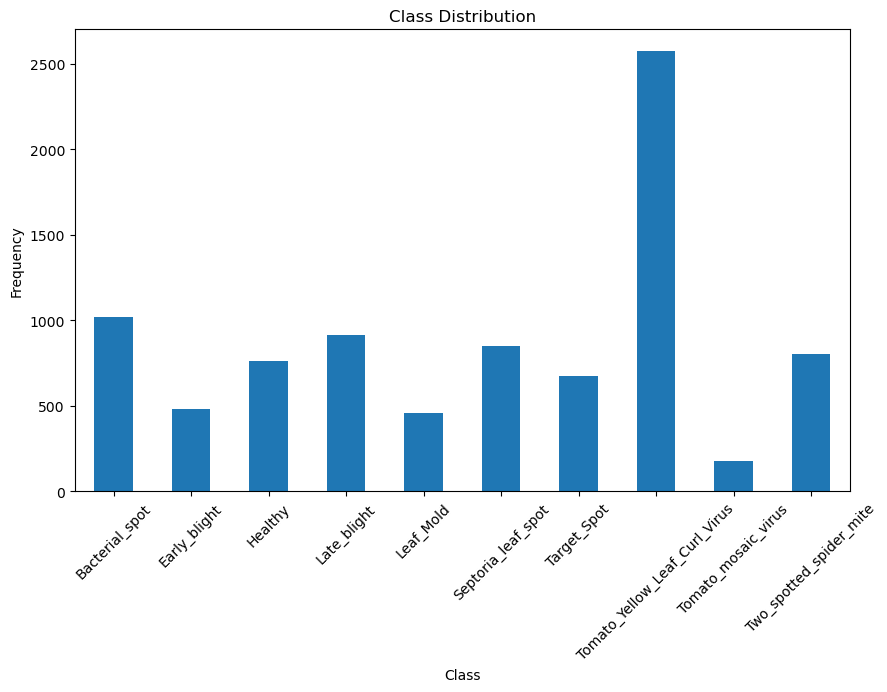

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `train_generator` is already defined
class_labels = list(train_generator.class_indices.keys())
class_counts = train_generator.classes
class_counts = pd.Series(class_counts).value_counts().sort_index()

plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(ticks=range(len(class_labels)), labels=class_labels, rotation=45)
plt.show()


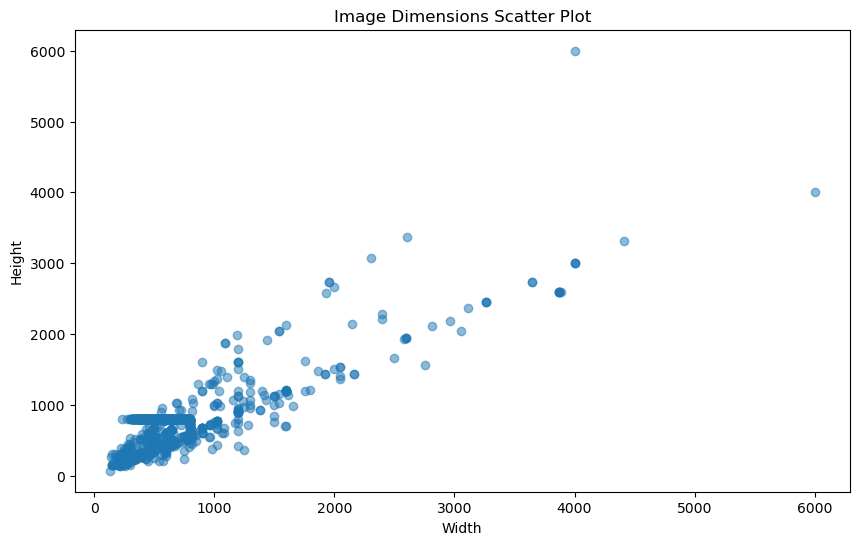

In [7]:
import os
from PIL import Image
import pandas as pd

image_dimensions = []

for subdir, dirs, files in os.walk('data/train'):
    for file in files:
        if file.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff')):  # Check for valid image extensions
            img = Image.open(os.path.join(subdir, file))
            image_dimensions.append(img.size)

dimensions_df = pd.DataFrame(image_dimensions, columns=['Width', 'Height'])
plt.figure(figsize=(10, 6))
plt.scatter(dimensions_df['Width'], dimensions_df['Height'], alpha=0.5)
plt.title('Image Dimensions Scatter Plot')
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()


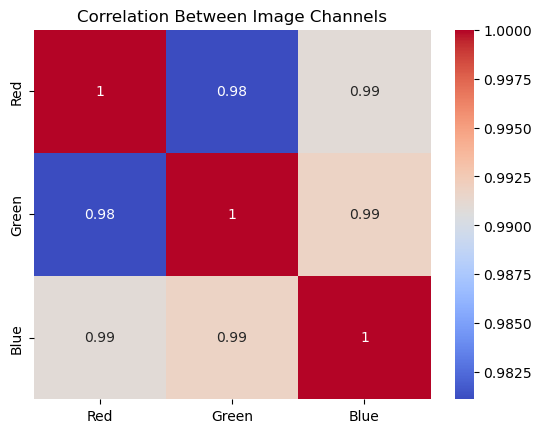

In [8]:
import cv2  # Import the OpenCV library
import seaborn as sns


img = cv2.imread('data/train/Bacterial_spot/00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG')  # Replace with an actual image path
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
channels = ['Red', 'Green', 'Blue']
channel_df = pd.DataFrame({channels[i]: img[:,:,i].flatten() for i in range(3)})

correlation_matrix = channel_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Image Channels')
plt.show()
